# Homework 6 | AI 231 | Michael Spencer Quinto

- Identify the sub scope that you will focus on
- Find data that is related to the individual project you want
- Do EDA for the data set that you have selected.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import cv2

from tqdm import tqdm
from IPython.display import display
from pathlib import Path

%load_ext autoreload
%autoreload 2

pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True, precision=3)

In [2]:
from hw_7_training import show_one_image_per_category

In [3]:
# dataset: https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri?resource=download:


training_file_path = Path("./brain_tumor_dataset/Training")
testing_file_path = Path("./brain_tumor_dataset/Testing")

# EDA


In [4]:
train_images_counts = {}
test_images_counts = {}

categories = ["glioma_tumor", "meningioma_tumor", "no_tumor", "pituitary_tumor"]

# Training
for category in categories:
    # print(category)
    train_category_path = training_file_path / category
    test_category_path = testing_file_path / category

    train_num_images = len(list(train_category_path.glob("*.jpg")))
    train_images_counts[category] = train_num_images

    test_num_images = len(list(test_category_path.glob("*.jpg")))
    test_images_counts[category] = test_num_images

In [5]:
print(train_images_counts)
print(test_images_counts)

{'glioma_tumor': 826, 'meningioma_tumor': 822, 'no_tumor': 395, 'pituitary_tumor': 827}
{'glioma_tumor': 100, 'meningioma_tumor': 115, 'no_tumor': 105, 'pituitary_tumor': 74}


In [7]:
def plot_counts(counts, title):
    plt.figure(figsize=(10, 6))
    plt.bar(counts.keys(), counts.values())
    plt.title(title)
    plt.xlabel("Categories")
    plt.ylabel("Number of Images")
    plt.show()

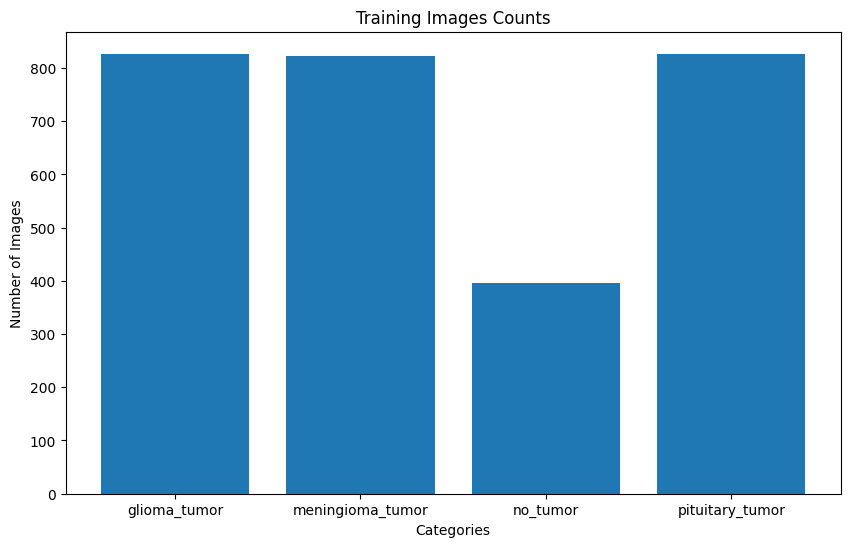

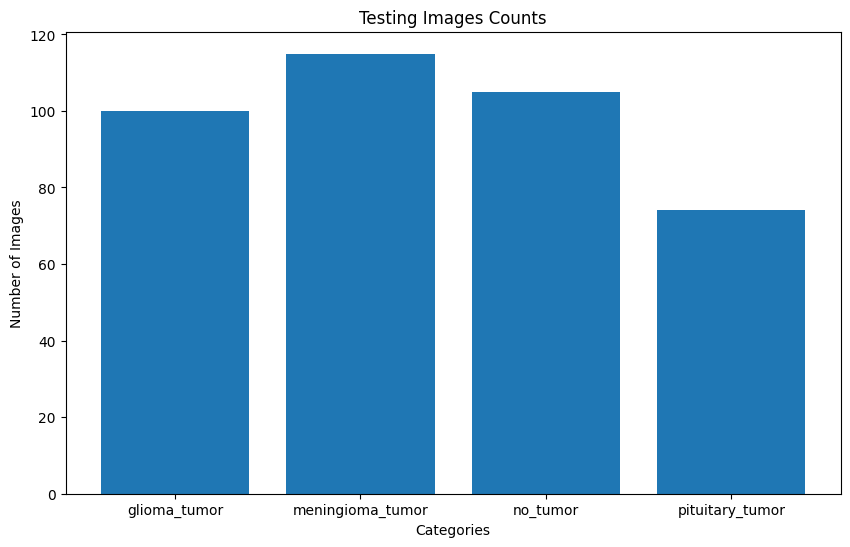

In [8]:
# Train Counts
plot_counts(train_images_counts, "Training Images Counts")

# Test Counts
plot_counts(test_images_counts, "Testing Images Counts")

In [9]:
import random


def plot_images(path: Path, categories: list[str], num_samples: int = 5):
    plt.figure(figsize=(15, 10))

    for i, category in enumerate(categories):
        category_path = path / category
        images = list(category_path.glob("*.jpg"))
        sample_images = random.sample(images, num_samples)

        for j, image in enumerate(sample_images):
            plt.subplot(num_samples, len(categories), i * len(categories) + j + 1)
            plt.imshow(plt.imread(image))
            plt.title(category)
            plt.axis("off")

    plt.tight_layout()
    plt.show()

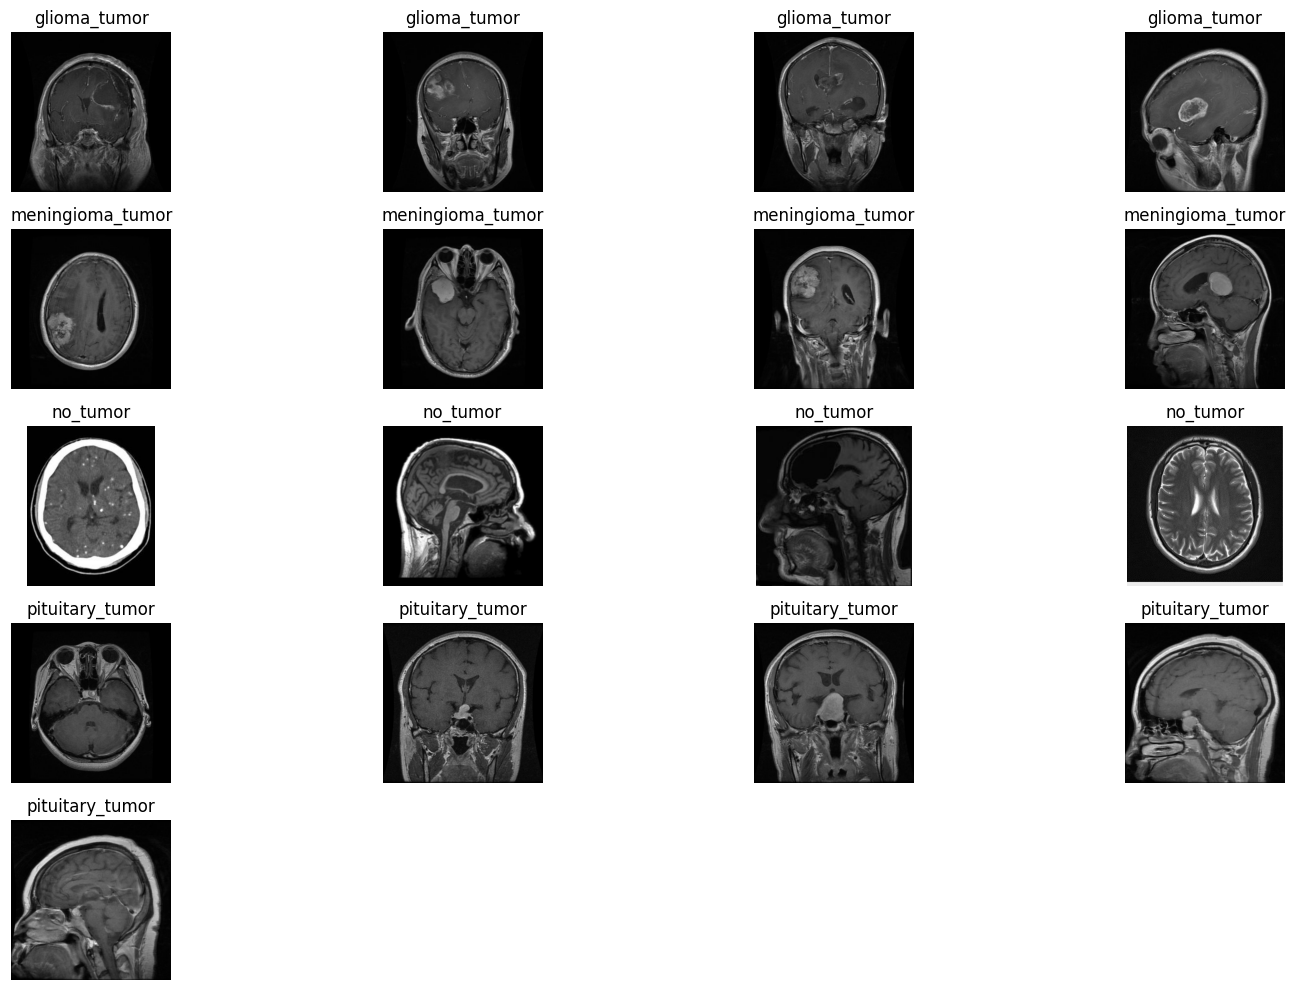

In [10]:
# sample 1
plot_images(training_file_path, categories)

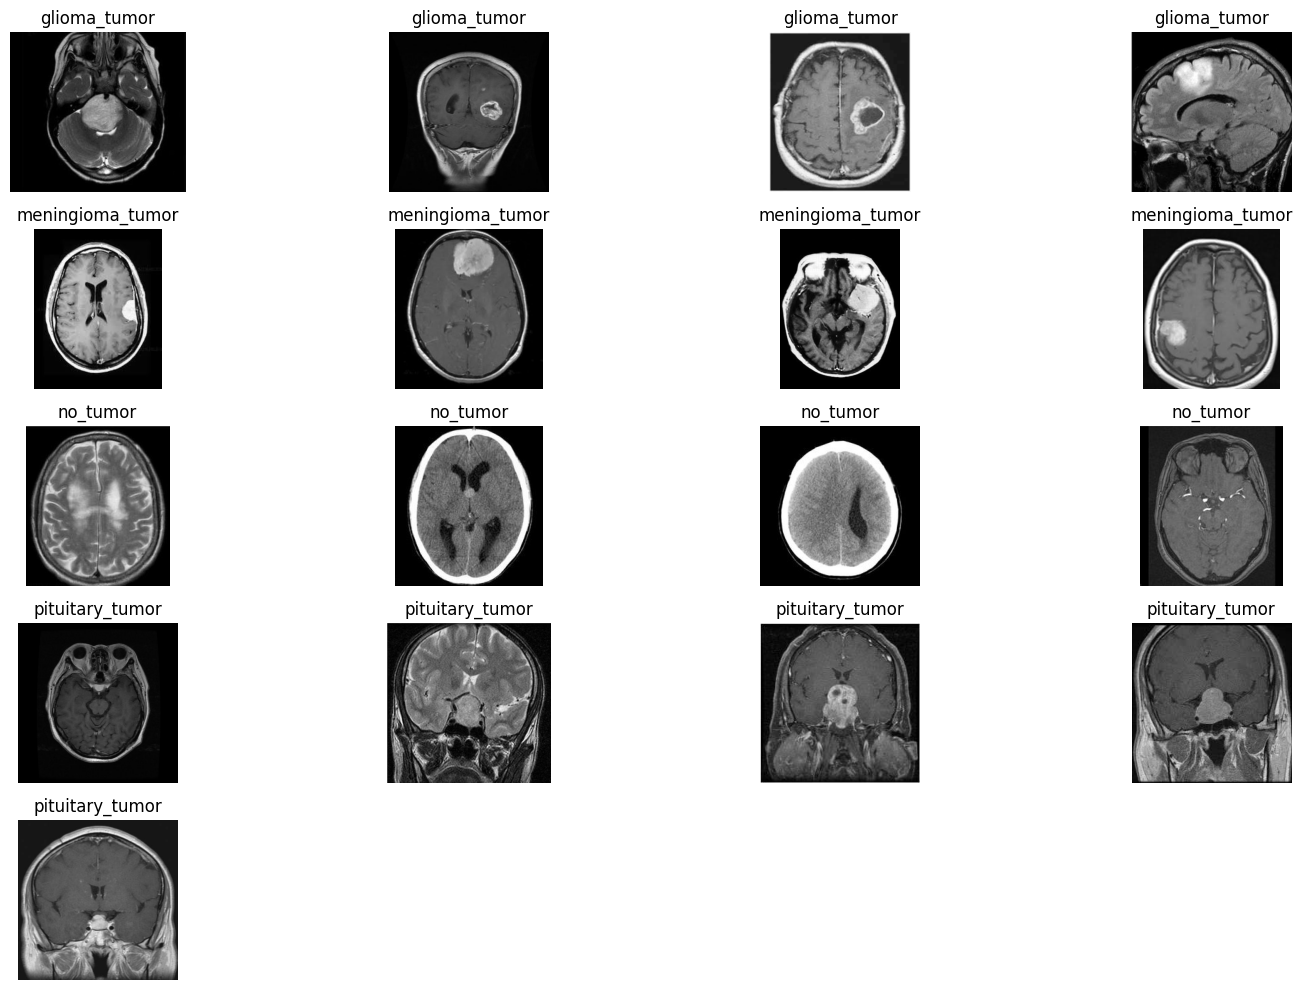

In [11]:
# sample 2
plot_images(testing_file_path, categories)

# Data Prep


In [12]:
# Vectorize and resize the images in preparation for training

X_train = []
y_train = []
X_test = []
y_test = []

image_size = 150
# Training
for i in categories:
    folderPath = training_file_path / i
    for j in tqdm(folderPath.glob("*.jpg")):
        # print(j)
        # img = cv2.imread(os.path.join(folderPath, j))
        img = cv2.imread(j)
        img = cv2.resize(img, (image_size, image_size))
        X_train.append(img)
        y_train.append(i)

# Testing
for i in categories:
    folderPath = testing_file_path / i
    for j in tqdm(folderPath.glob("*.jpg")):
        # img = cv2.imread(os.path.join(folderPath, j))
        img = cv2.imread(j)
        img = cv2.resize(img, (image_size, image_size))
        X_test.append(img)
        y_test.append(i)

X_train = np.array(X_train)
y_train = np.array(y_train)

X_test = np.array(X_test)
y_test = np.array(y_test)

print("Training Data, Shape:")
display(X_train.shape)
# print(X_train[:5])
display(y_train.shape)
print(y_train[:5])
print("Testing Data, Shape:")
display(X_test.shape)
# print(X_test[:5])
display(y_test.shape)
print(y_test[:5])

826it [00:00, 1489.87it/s]
822it [00:00, 1516.89it/s]
395it [00:00, 1562.63it/s]
827it [00:00, 1245.34it/s]
100it [00:00, 1489.78it/s]
115it [00:00, 1900.60it/s]
105it [00:00, 2910.44it/s]
74it [00:00, 684.06it/s]

Training Data, Shape:


(2870, 150, 150, 3)

(2870,)

['glioma_tumor' 'glioma_tumor' 'glioma_tumor' 'glioma_tumor'
 'glioma_tumor']
Testing Data, Shape:


(394, 150, 150, 3)

(394,)

['glioma_tumor' 'glioma_tumor' 'glioma_tumor' 'glioma_tumor'
 'glioma_tumor']


# Image from the vectorized 150x150 np arrays


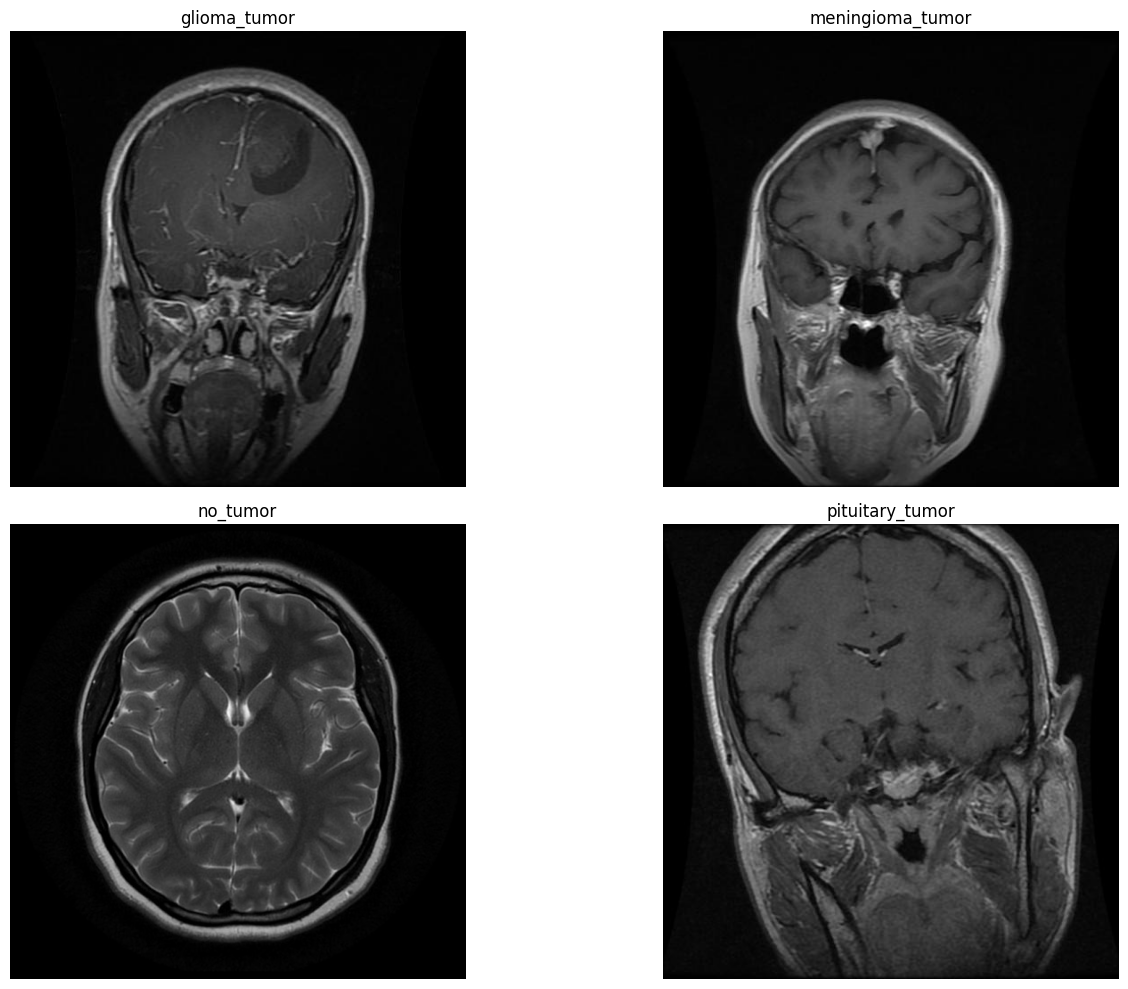

In [13]:
show_one_image_per_category(
    categories,
    training_file_path,
)

In [14]:
print(y_train[:15])
print(y_train[1500:1515])
print(y_test[:15])

['glioma_tumor' 'glioma_tumor' 'glioma_tumor' 'glioma_tumor'
 'glioma_tumor' 'glioma_tumor' 'glioma_tumor' 'glioma_tumor'
 'glioma_tumor' 'glioma_tumor' 'glioma_tumor' 'glioma_tumor'
 'glioma_tumor' 'glioma_tumor' 'glioma_tumor']
['meningioma_tumor' 'meningioma_tumor' 'meningioma_tumor'
 'meningioma_tumor' 'meningioma_tumor' 'meningioma_tumor'
 'meningioma_tumor' 'meningioma_tumor' 'meningioma_tumor'
 'meningioma_tumor' 'meningioma_tumor' 'meningioma_tumor'
 'meningioma_tumor' 'meningioma_tumor' 'meningioma_tumor']
['glioma_tumor' 'glioma_tumor' 'glioma_tumor' 'glioma_tumor'
 'glioma_tumor' 'glioma_tumor' 'glioma_tumor' 'glioma_tumor'
 'glioma_tumor' 'glioma_tumor' 'glioma_tumor' 'glioma_tumor'
 'glioma_tumor' 'glioma_tumor' 'glioma_tumor']


# Encoding the Categories/Labels


In [15]:
from sklearn.preprocessing import LabelEncoder

# Create and fit the encoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# display first few encoded labels
print(y_train_encoded[:15])
print(y_train_encoded[1500:1515])
print(y_test_encoded[:15])

# show the equivalent of the numbers to the categories (only the unique values)
for class_label in label_encoder.classes_:
    encoded_value = label_encoder.transform([class_label])[0]
    print(f"{class_label}: {encoded_value}")

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
glioma_tumor: 0
meningioma_tumor: 1
no_tumor: 2
pituitary_tumor: 3


# Testing using EfficientNet


In [30]:
import torch
import torch.nn as nn
from torchvision.models import efficientnet_b0, EfficientNet_B0_Weights


class TumorClassifier(nn.Module):
    def __init__(self, num_classes=2):  # num_classes=2 for glioma vs meningioma
        super(TumorClassifier, self).__init__()

        # Load pretrained EfficientNetB0
        self.effnet = efficientnet_b0(weights=EfficientNet_B0_Weights.IMAGENET1K_V1)

        # Remove the last layer
        num_features = self.effnet.classifier[1].in_features
        self.effnet = nn.Sequential(*list(self.effnet.children())[:-1])

        # Add custom classifier
        self.classifier = nn.Sequential(
            nn.AdaptiveAvgPool2d(1),  # Global Average Pooling
            nn.Flatten(),
            nn.Dropout(p=0.5),
            nn.Linear(num_features, num_classes),
        )

        # Add softmax for probability output
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        # Forward pass through EfficientNet features
        x = self.effnet(x)
        # Forward pass through classifier
        x = self.classifier(x)
        # Apply softmax
        x = self.softmax(x)
        return x


# Create the model
model = TumorClassifier(num_classes=2)  # 2 classes for your tumor types

# Move to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

from torchinfo import summary

# Define input size: (batch_size, channels, height, width)
summary(model, input_size=(1, 3, 224, 224))

Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /Users/ggwp/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth


KeyboardInterrupt: 

In [ ]:
import torch
from torch.utils.data import DataLoader, random_split
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np


def train_model(
    model, train_dataset, batch_size=32, epochs=10, val_split=0.2, lr=0.001
):
    # Split dataset into train and validation
    val_size = int(len(train_dataset) * val_split)
    train_size = len(train_dataset) - val_size
    train_subset, val_subset = random_split(train_dataset, [train_size, val_size])

    # Create data loaders
    train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_subset, batch_size=batch_size)

    # Initialize loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    # Lists to store metrics
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    # Training loop
    for epoch in range(epochs):
        # Training phase
        model.train()
        total_train_loss = 0
        correct_train = 0
        total_train = 0

        # Create progress bar for training
        train_pbar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs} [Train]")

        for inputs, labels in train_pbar:
            inputs, labels = inputs.to(device), labels.to(device)

            # Zero the gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

            # Calculate accuracy
            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

            # Update total loss
            total_train_loss += loss.item()

            # Update progress bar
            train_pbar.set_postfix(
                {
                    "loss": f"{loss.item():.4f}",
                    "acc": f"{100 * correct_train / total_train:.2f}%",
                }
            )

        # Calculate average training metrics
        avg_train_loss = total_train_loss / len(train_loader)
        train_accuracy = 100 * correct_train / total_train

        # Validation phase
        model.eval()
        total_val_loss = 0
        correct_val = 0
        total_val = 0

        # Create progress bar for validation
        val_pbar = tqdm(val_loader, desc=f"Epoch {epoch+1}/{epochs} [Val]")

        with torch.no_grad():
            for inputs, labels in val_pbar:
                inputs, labels = inputs.to(device), labels.to(device)

                outputs = model(inputs)
                loss = criterion(outputs, labels)

                # Calculate accuracy
                _, predicted = torch.max(outputs.data, 1)
                total_val += labels.size(0)
                correct_val += (predicted == labels).sum().item()

                total_val_loss += loss.item()

                # Update progress bar
                val_pbar.set_postfix(
                    {
                        "loss": f"{loss.item():.4f}",
                        "acc": f"{100 * correct_val / total_val:.2f}%",
                    }
                )

        # Calculate average validation metrics
        avg_val_loss = total_val_loss / len(val_loader)
        val_accuracy = 100 * correct_val / total_val

        # Store metrics
        train_losses.append(avg_train_loss)
        val_losses.append(avg_val_loss)
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)

        print(f"\nEpoch {epoch+1}/{epochs}:")
        print(
            f"Training Loss: {avg_train_loss:.4f}, Training Accuracy: {train_accuracy:.2f}%"
        )
        print(
            f"Validation Loss: {avg_val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%\n"
        )

    # Plot training curves
    plt.figure(figsize=(12, 4))

    # Plot loss curves
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label="Training Loss")
    plt.plot(val_losses, label="Validation Loss")
    plt.title("Loss Curves")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    # Plot accuracy curves
    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label="Training Accuracy")
    plt.plot(val_accuracies, label="Validation Accuracy")
    plt.title("Accuracy Curves")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy (%)")
    plt.legend()

    plt.tight_layout()
    plt.show()

    return train_losses, val_losses, train_accuracies, val_accuracies


# Usage:
train_losses, val_losses, train_accuracies, val_accuracies = train_model(
    model,
    train_dataset,  # Your dataset
    batch_size=32,
    epochs=10,
    val_split=0.2,
    lr=0.001,
)

In [ ]:
# # Define loss function and optimizer
# criterion = nn.CrossEntropyLoss()
# optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# # For training loop
# model.train()
# for inputs, labels in train_loader:  # Assuming you have a DataLoader
#     inputs, labels = inputs.to(device), labels.to(device)

#     # Zero the gradients
#     optimizer.zero_grad()

#     # Forward pass
#     outputs = model(inputs)

#     # Calculate loss
#     loss = criterion(outputs, labels)

#     # Backward pass and optimize
#     loss.backward()
#     optimizer.step()